In [1]:
import spidev
import time
import os
import numpy as np
import matplotlib.pyplot as plt

# Open SPI bus
spi = spidev.SpiDev()
spi.open(0, 0)
spi.max_speed_hz = 1000000

In [2]:
def read_channel(channel):
    adc = spi.xfer2([1, (8 + channel) << 4, 0])
    data = ((adc[1] & 3) << 8) + adc[2]
    return data

In [3]:
def convert_volts(data):
    volts = (data * 3.3) / float(1023)
    return volts

In [6]:
light_level = read_channel(0)
light_volts = convert_volts(light_level)
light_volts

0.02258064516129032

In [32]:
v = []
N = 10000
p = 2. / N
for i in range(N):
    time.sleep(p)
    light_level = read_channel(0)
    light_volts = convert_volts(light_level)
    v.append(light_volts)
    # print(light_level)

(0.0, 0.05)

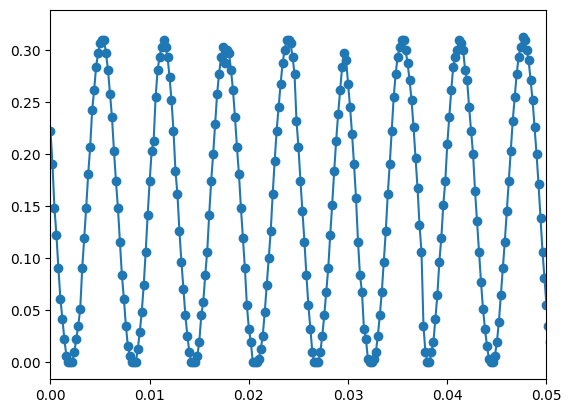

In [34]:
plt.scatter(np.arange(N) * p, v)
plt.plot(np.arange(N) * p, v)
plt.xlim(0,0.05);

In [3]:
import numpy as np

np.linspace(0, 0.04, 10, endpoint=False)

array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
       0.036])

In [26]:
120 * 0.002

0.24

In [4]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9
